In [1]:
import numpy as np
from pathlib import Path
from utils.analysis.tools import simDir, periodicity_plot
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

In [108]:
folder = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240223_PhaseDiagramHillFaster/M1_1.0_b_-0.25_g_-0.1_c_0.03_k_0.05_kp_0.2_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_250.0_kd_1.0")
sim = simDir(folder)
sim.run()
sim.condensate()

In [109]:
def periodicity_plot(sim,threshold,leftlim=0,rightlim=20000):
    sim.periodicity(threshold)
    rna = np.ravel(sim.rna_amount)
    com = np.ravel(sim.com[:,0])
    time = np.ravel(sim.time)
    time = time[:len(rna)]
    fig,axes = plt.subplots(4,1,sharex=True)
    fig.set_size_inches(5,3)
    axes[0].plot(time,rna)
    start = np.argmin((time-threshold)**2)
    axes[0].scatter(time[sim.peaks],rna[sim.peaks],alpha=0.3)
    axes[0].scatter(time[sim.troughs],rna[sim.troughs],alpha=0.3)
    diffs = np.diff(time[sim.peaks],axis=0)
    locst = (time[sim.peaks][:-1] + time[sim.peaks][1:])/2
    for i in range(len(diffs)):
        axes[0].annotate(f"{diffs[i].item():.0f}",(locst[i],0),ha='center',rotation=90,
                         va='bottom')
    axes[1].plot(time,com)
    axes[2].plot(time,np.var(sim.radius,axis=1))
    axes[3].plot(time,sim.eccentricity)
    [ax.axvline(i, color='grey', ls='dashed') for i in time[sim.peaks] for ax in axes]
    axes[3].set_xlabel("Time")
    axes[0].set_ylabel("RNA\nAmount")
    axes[1].set_ylabel("Center of\nMass")
    axes[2].set_ylabel("Variance of\nRadius")
    axes[3].set_ylabel("Eccentricity")
    axes[3].set_xlim(left=leftlim,right=rightlim)
    return fig,axes,sim.peaks,sim.troughs

Text(0.5, 0.98, 'Time Delay = 250')

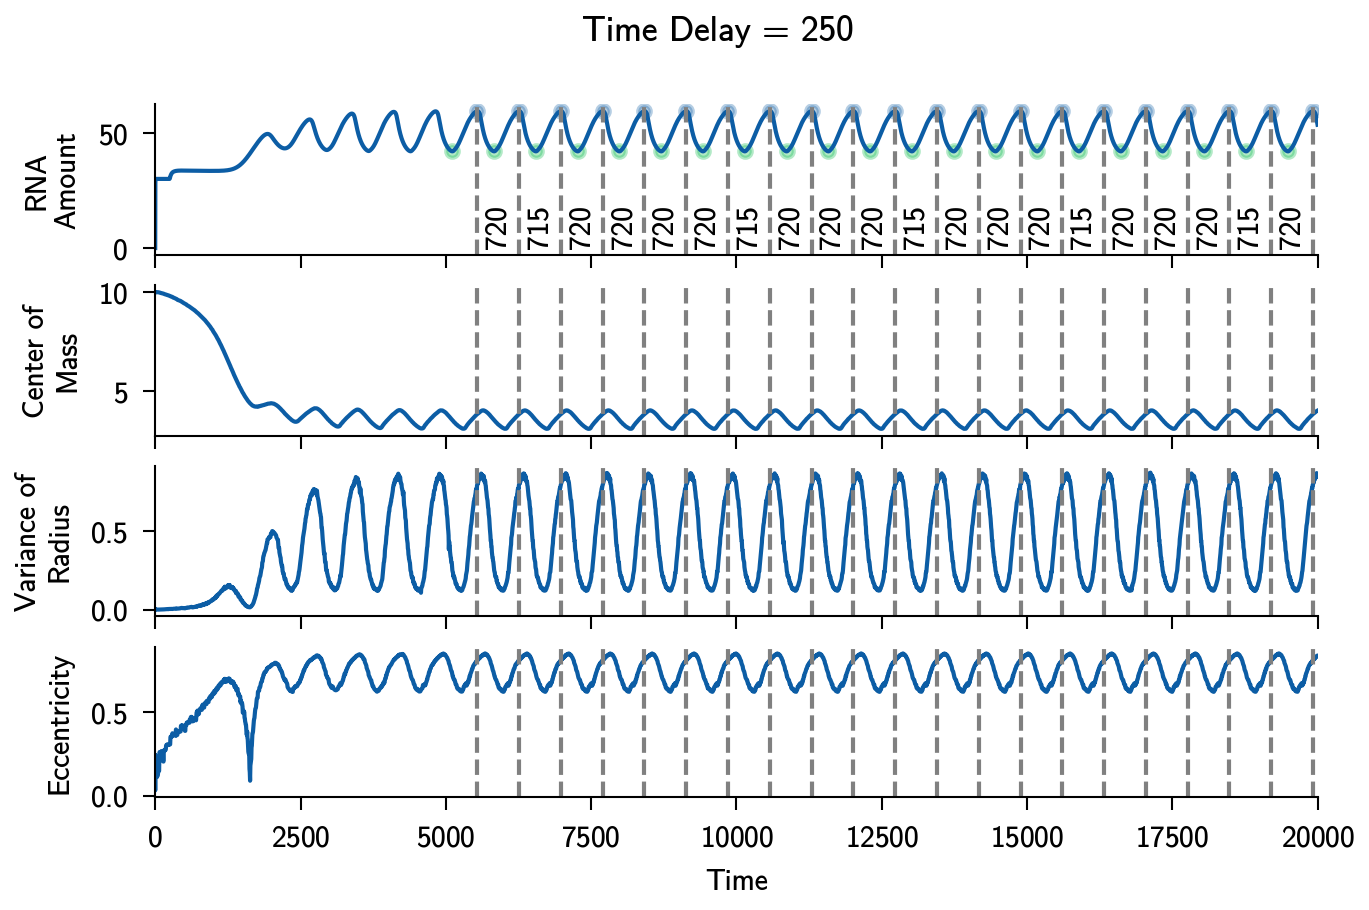

In [110]:
fig, axes, peaks, troughs = periodicity_plot(sim,5000)
fig.suptitle("Time Delay = 250")

In [111]:
def shape(xy,c,ax,cmap="Blues",vmin=None,vmax=None):
    x = xy[:,0]
    y = xy[:,1]
    ax.tricontourf(x,y,c,cmap=cmap,
                   vmin=vmin,vmax=vmax)
    ax.set_aspect(1)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False)

In [120]:
mids = ((peaks+troughs)/2).astype(int)

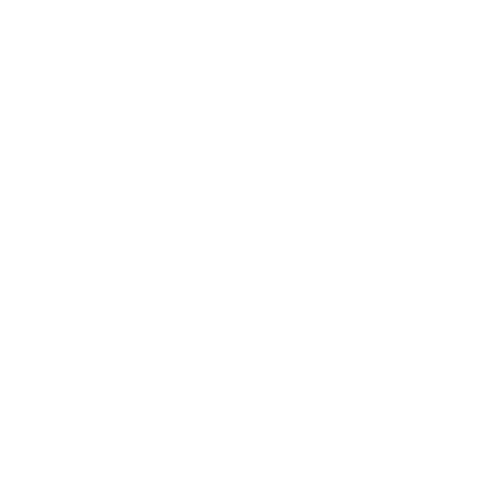

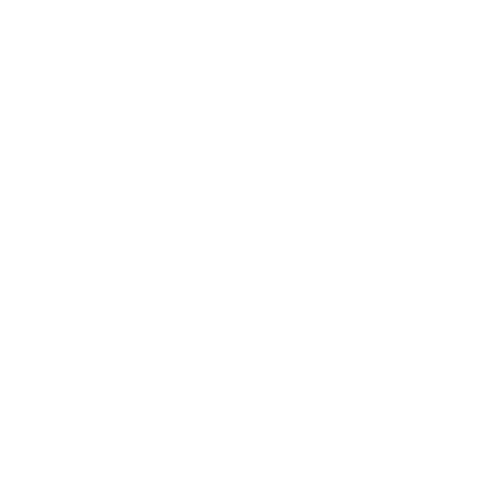

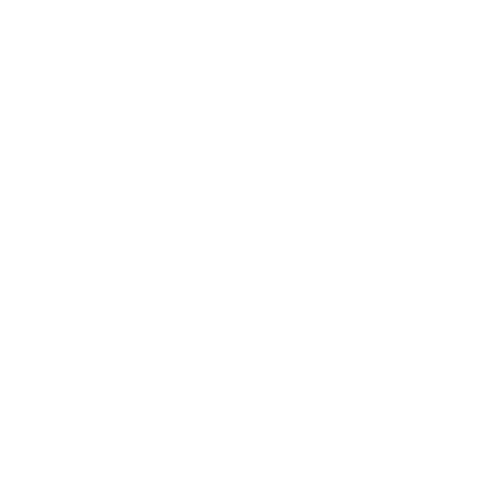

In [121]:
time = peaks[11]
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
x = xy[:,0]
y = xy[:,1]
time = peaks[12]
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
x = xy[:,0]
y = xy[:,1]
time = peaks[13]
fig,ax = plt.subplots()
ax.axis("off")
ax.set_aspect("equal")
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
x = xy[:,0]
y = xy[:,1]

In [122]:
times = np.linspace(mids[19],mids[20],10).astype(int)
fig,axes = plt.subplots(1,len(times))
fig.set_size_inches(30,15)
for ax, time in zip(np.ravel(axes),times):
    xy = sim.xy[sim.mask[time,:],:]
    conc = sim.concentration_profile[0][time][sim.mask[time,:]]
    shape(xy,conc,ax)
# plt.savefig("deform_collapse.png", transparent=True, dpi=600, bbox_inches='tight')

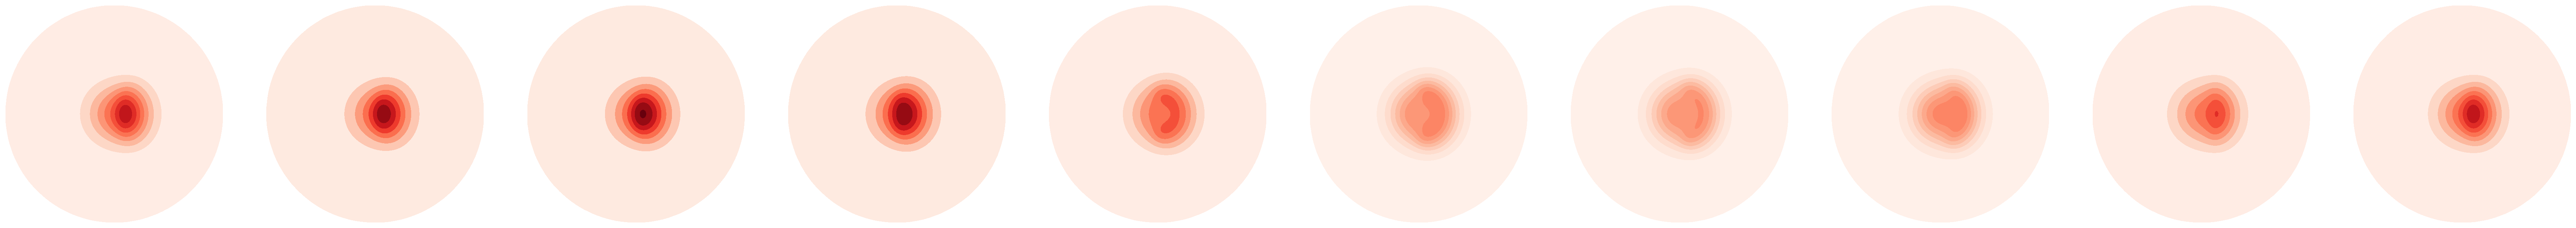

In [117]:
fig,axes = plt.subplots(1,len(times))
fig.set_size_inches(30,15)
for ax, time in zip(np.ravel(axes),times):
    xy = sim.xy
    conc = sim.concentration_profile[1][time]
    shape(xy,conc,ax,cmap="Reds",vmin=sim.plotting_range[1][0],vmax=sim.plotting_range[1][1])
# plt.savefig("deform_collapse.png", transparent=True, dpi=600, bbox_inches='tight')

Text(0.5, 0, 'Time')

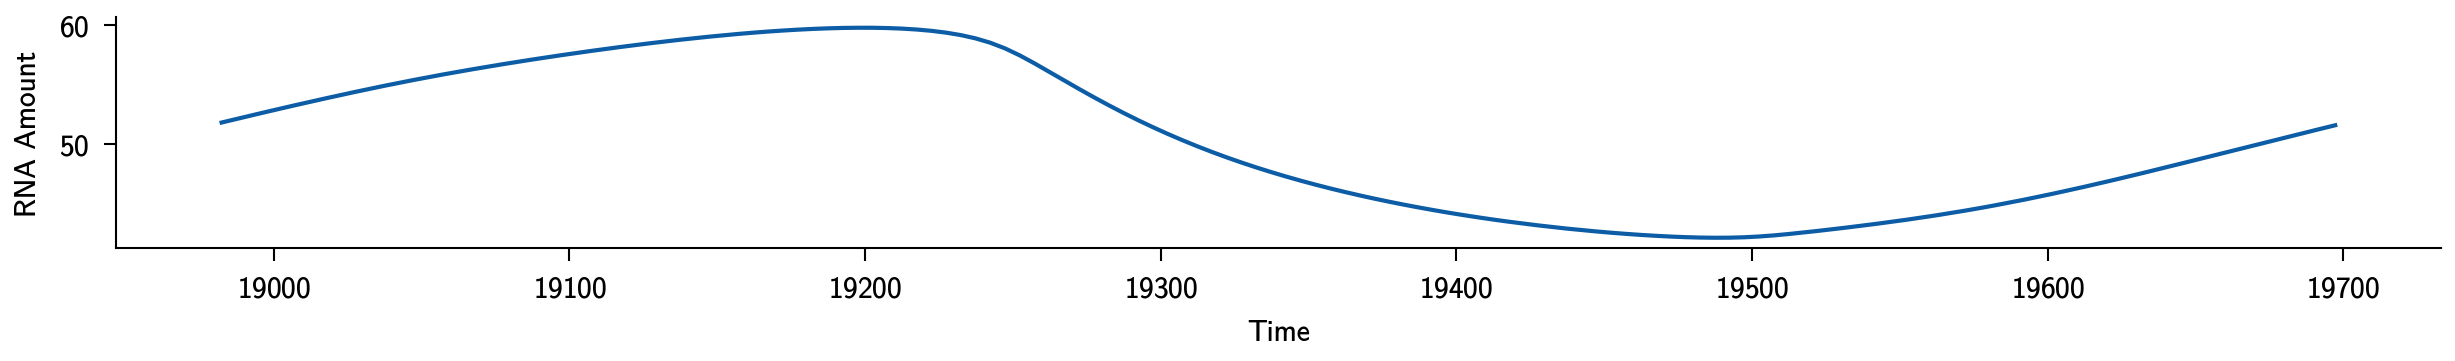

In [118]:
fig,ax = plt.subplots()
fig.set_size_inches(10,1)
ax.plot(sim.time[times[0]:times[-1]],sim.rna_amount[times[0]:times[-1]])
ax.set_ylabel("RNA Amount")
ax.set_xlabel("Time")

In [25]:
folder = Path("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240223_PhaseDiagramHillFaster/M1_1.0_b_-0.25_g_-0.1_c_0.015_k_0.05_kp_0.2_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_100.0_kd_1.0")
sim = simDir(folder)
sim.run()
sim.condensate()

In [29]:
def periodicity_plot(sim,threshold,leftlim=0,rightlim=20000):
    sim.periodicity(threshold)
    rna = np.ravel(sim.rna_amount)
    com = np.ravel(sim.com[:,0])
    time = np.ravel(sim.time)
    if time.size > com.size:
        time = time[:com.size]
    fig,axes = plt.subplots(4,1,sharex=True)
    fig.set_size_inches(5,3)
    axes[0].plot(time,rna)
    start = np.argmin((time-threshold)**2)
    axes[0].scatter(time[sim.peaks],rna[sim.peaks],alpha=0.3)
    axes[0].scatter(time[sim.troughs],rna[sim.troughs],alpha=0.3)
    diffs = np.diff(time[sim.peaks],axis=0)
    locst = (time[sim.peaks][:-1] + time[sim.peaks][1:])/2
    for i in range(len(diffs)):
        axes[0].annotate(f"{diffs[i].item():.0f}",(locst[i],0),ha='center',rotation=90,
                         va='bottom')
    axes[1].plot(time,com)
    axes[2].plot(time,np.var(sim.radius,axis=1))
    axes[3].plot(time,sim.eccentricity)
    [ax.axvline(i, color='grey', ls='dashed') for i in time[sim.peaks] for ax in axes]
    axes[3].set_xlabel("Time")
    axes[0].set_ylabel("RNA\nAmount")
    axes[1].set_ylabel("Center of\nMass")
    axes[2].set_ylabel("Variance of\nRadius")
    axes[3].set_ylabel("Eccentricity")
    axes[3].set_xlim(left=leftlim,right=rightlim)
    return fig,axes,sim.peaks,sim.troughs

Text(0.5, 0.98, 'Time Delay = 100')

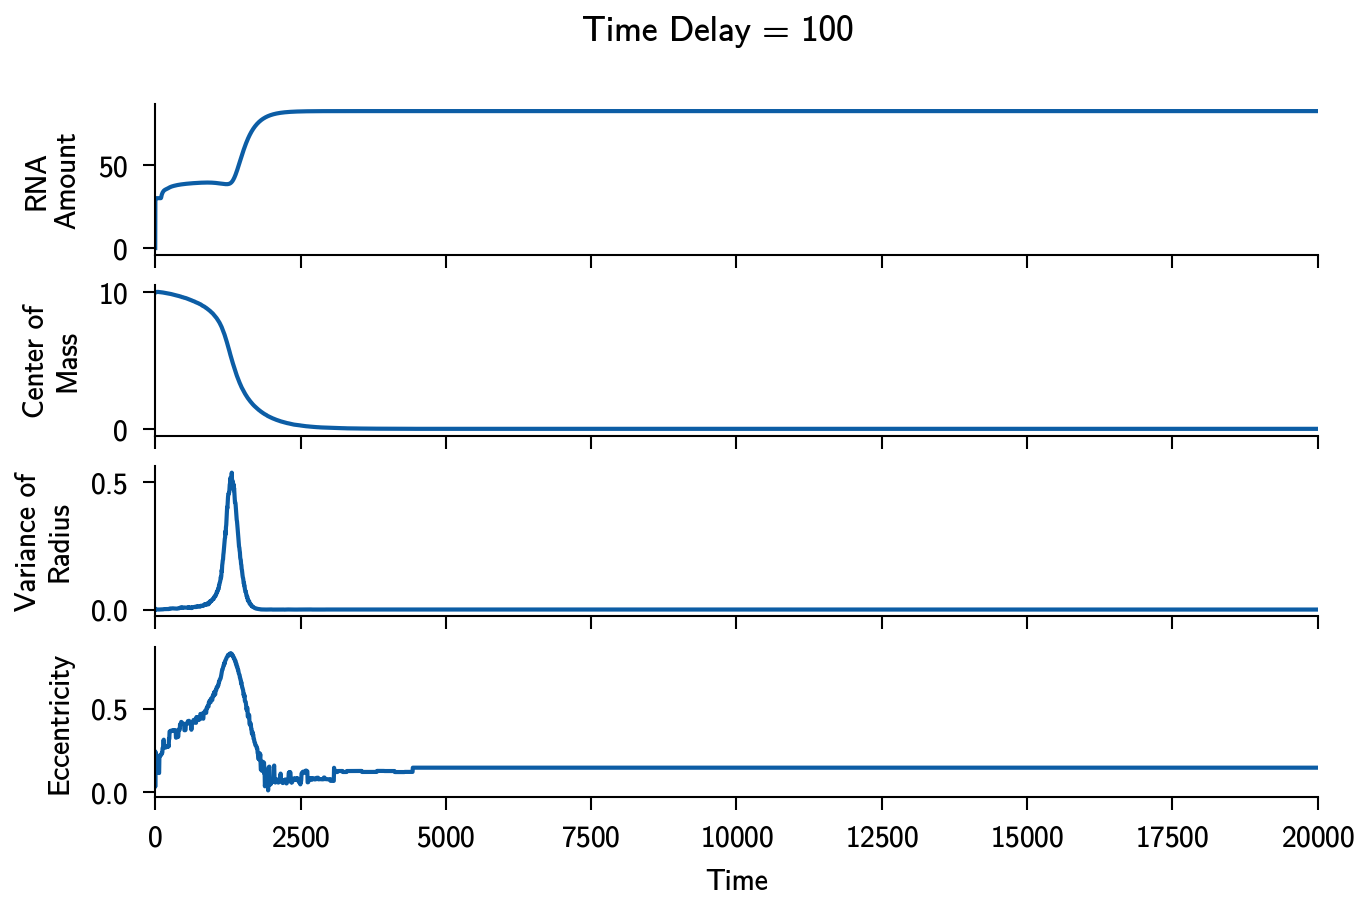

In [31]:
fig, axes, peaks, troughs = periodicity_plot(sim,20000)
fig.suptitle("Time Delay = 100")